In [15]:
#Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 

from scipy.stats import pearsonr
import scipy.stats as stats
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, f1_score, mean_squared_error,
    ConfusionMatrixDisplay
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import optuna
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import lime
from lime.lime_tabular import LimeTabularExplainer
import lightgbm as lgb



In [16]:
#Import data
train_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/train_df_cleaned.csv', delimiter=',', encoding='utf-8',index_col=0)
test_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/test_df_cleaned.csv', delimiter=',', encoding='utf-8',index_col=0)



## Data Splitting

In [17]:
X_train = train_df.drop(columns=['is_fraud'])  
y_train = train_df['is_fraud']  

X_test = test_df.drop(columns=['is_fraud'])  
y_test = test_df['is_fraud']  


In [19]:
train_df

,zip,city_pop,unix_time,merch_long,dob_month,dob_day,age,avg_transaction_amt,std_transaction_amt,transaction_count,...,state_PA,state_SC,state_TN,state_TX,state_VA,state_WA,state_WI,state_WV,state_WY,is_fraud
cc_num,,,,,,,,,,,,,,,,,,,,,
0.0,0.823573,0.363638,0.000184,0.242834,2,17,39,0.129689,0.493415,0.457766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.0,0.823573,0.363638,0.000902,0.240082,2,17,39,0.129689,0.493415,0.457766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.0,0.823573,0.363638,0.004250,0.221548,2,17,39,0.129689,0.493415,0.457766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.0,0.823573,0.363638,0.005879,0.230414,2,17,39,0.129689,0.493415,0.457766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.0,0.823573,0.363638,0.010388,0.228224,2,17,39,0.129689,0.493415,0.457766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,0.608915,0.266659,0.995300,0.602024,1,9,69,0.171583,0.476256,0.583787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.608915,0.266659,0.995959,0.582463,1,9,69,0.171583,0.476256,0.583787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.608915,0.266659,0.997259,0.597279,1,9,69,0.171583,0.476256,0.583787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🎯 Evaluation metrics

In [23]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

In [20]:
import plotly.graph_objs as go
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, auc, balanced_accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.validation import check_is_fitted
from imblearn.metrics import geometric_mean_score
import numpy as np
from plotly.subplots import make_subplots

def evaluate_model_interactive(model, X_train, X_test, y_train, y_test, threshold_plot=False):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    try:
        check_is_fitted(model, "predict_proba")
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            y_train_proba = model.decision_function(X_train)
            y_test_proba = model.decision_function(X_test)
        except AttributeError:
            print("Warning: AUC calculation skipped (no probability outputs available)")
            y_train_proba = None
            y_test_proba = None

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    overall_accuracy = accuracy_score(np.concatenate([y_train, y_test]), np.concatenate([y_train_pred, y_test_pred]))

    balanced_acc_train = balanced_accuracy_score(y_train, y_train_pred)
    balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)
    balanced_acc_overall = (balanced_acc_train + balanced_acc_test) / 2

    f1 = f1_score(y_test, y_test_pred)
    g_mean = geometric_mean_score(y_test, y_test_pred)

    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
    class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
    recalls = recall_score(y_test, y_test_pred, average=None)

    wba_train = sum(class_weight_dict[i] * recall_score(y_train, y_train_pred, average=None)[i] for i in range(len(recalls))) / sum(class_weights)
    wba_test = sum(class_weight_dict[i] * recalls[i] for i in range(len(recalls))) / sum(class_weights)
    wba_overall = (wba_train + wba_test) / 2

    mcc = matthews_corrcoef(y_test, y_test_pred)

    print(f"\033[1;34mAlgorithm:\033[0m {type(model).__name__}")
    print("\n\033[1;32mClassification Report:\033[0m\n", classification_report(y_test, y_test_pred, target_names=["No Churn", "Churn"]))
    print(f"\033[1;36mTraining Accuracy:\033[0m {train_accuracy:.4f}")
    print(f"\033[1;36mTest Accuracy:\033[0m {test_accuracy:.4f}")
    print(f"\033[1;36mOverall Accuracy:\033[0m {overall_accuracy:.4f}")

    print(f"\033[1;35mG-Mean:\033[0m {g_mean:.4f}")
    print(f"\033[1;35mMatthews Correlation Coefficient (MCC):\033[0m {mcc:.4f}")

    if y_test_proba is not None:
        precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
        pr_auc_train = auc(recall_train, precision_train)

        precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
        pr_auc_test = auc(recall_test, precision_test)

        recall_combined = np.concatenate([recall_train, recall_test])
        precision_combined = np.concatenate([precision_train, precision_test])

        sorted_indices = np.argsort(recall_combined)
        recall_combined = recall_combined[sorted_indices]
        precision_combined = precision_combined[sorted_indices]

        print(f"\033[1;31mTraining Precision-Recall AUC:\033[0m {pr_auc_train:.4f}")
        print(f"\033[1;31mTest Precision-Recall AUC:\033[0m {pr_auc_test:.4f}")
        print(f"\033[1;31mOverall Precision-Recall AUC:\033[0m {auc(recall_combined, precision_combined):.4f}")

        trace1 = go.Scatter(
            x=recall_test, y=precision_test,
            name="Test Precision-Recall Curve",
            line=dict(color='blue', width=3),
            hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}'
        )

        trace2 = go.Scatter(
            x=recall_train, y=precision_train,
            name="Train Precision-Recall Curve",
            line=dict(color='green', width=3),
            hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}'
        )

        trace3 = go.Scatter(
            x=recall_combined, y=precision_combined,
            name="Overall Precision-Recall Curve",
            line=dict(color='purple', width=3, dash='dot'),
            hovertemplate='<b>Recall:</b> %{x}<br><b>Precision:</b> %{y}'
        )

        trace4 = go.Scatter(
            x=[0, 1], y=[1, 0],
            name="Random Chance",
            line=dict(color='red', dash='dash', width=2)
        )

    conf_matrix = confusion_matrix(y_test, y_test_pred)

    heatmap = go.Heatmap(
        z=conf_matrix,
        x=["No fraud", "fraud"],
        y=["No fraud", "fraud"],
        colorscale=[
            [0.0, "#FFF7EC"],
            [0.33, "#FDBB84"],
            [0.66, "#FC8D59"],
            [1.0, "#D7301F"]
        ],
        zmin=0,
        zmax=conf_matrix.max(),
        colorbar=dict(title="Count"),
        hovertemplate="True Class: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>",
        showscale=True
    )

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            'Confusion Matrix',
            'Precision-Recall Curve'
        )
    )

    fig.add_trace(heatmap, row=1, col=1)
    fig.add_trace(trace1, row=1, col=2)
    fig.add_trace(trace2, row=1, col=2)
    fig.add_trace(trace3, row=1, col=2)
    fig.add_trace(trace4, row=1, col=2)

    fig.update_layout(
        showlegend=False,
        title="Model Performance",
        autosize=True,
        height=600, width=1000,
        plot_bgcolor='rgba(240,240,240,0.95)',
        paper_bgcolor='rgba(240,240,240,0.95)',
        font=dict(family="Arial", size=12),
    )

    fig["layout"]["xaxis1"].update(title="Predicted Labels")
    fig["layout"]["yaxis1"].update(title="Actual Labels")
    fig["layout"]["xaxis2"].update(title="Recall")
    fig["layout"]["yaxis2"].update(title="Precision")

    fig.show()


In [21]:
def shap_beeswarm_plot(model, X_train, X_test, model_type="auto", max_display=10, instance_index=0):
    if model_type == "auto":
        if hasattr(model, "predict_proba") and "Tree" in str(type(model)):  
            explainer = shap.TreeExplainer(model)
            model_type = "tree"
        else:
            explainer = shap.KernelExplainer(model.predict, X_train[:50])
            model_type = "kernel"
    elif model_type == "tree":
        explainer = shap.TreeExplainer(model)
    elif model_type == "kernel":
        explainer = shap.KernelExplainer(model.predict_proba, X_train[:50])
    else:
        raise ValueError("Invalid model_type. Use 'tree', 'kernel', or 'auto'.")

    print(f"Using SHAP {model_type.capitalize()}Explainer for {type(model).__name__}")

    
    shap_values = explainer.shap_values(X_test)

    
    plt.figure(figsize=(12, 8))
    if isinstance(shap_values, list):  
        shap.summary_plot(shap_values[1], X_test, max_display=max_display)
    else:  
        shap.summary_plot(shap_values, X_test, max_display=max_display)


    shap.initjs()
    if isinstance(shap_values, list):  
        shap.plots.force(explainer.expected_value[1], shap_values[1][instance_index], X_test.iloc[instance_index])
    else:
        shap.plots.force(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])


<div style="text-align: center; background-color: #e0f7fa; padding: 20px; border-radius: 10px; font-size: 24px; font-weight: bold; color: #004d40;">
    🌿 Tree Ensembles
</div>


In [24]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 7, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None,0.7,0.8])  
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.05)
    
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        splitter=splitter,
        class_weight=class_weights,  
        ccp_alpha=ccp_alpha,
        random_state=42
    )


    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
    accuracy_scores = []

    for train_index, val_index in stratified_kfold.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]  
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))

    return np.mean(accuracy_scores)

study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=50)  


best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")

[I 2025-09-23 17:24:15,332] A new study created in memory with name: no-name-1561df70-f79b-41c0-bec9-3f49cd96cf44
[I 2025-09-23 17:24:20,918] Trial 0 finished with value: 0.20231590754356113 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 22, 'min_samples_leaf': 44, 'max_features': 'sqrt', 'splitter': 'best', 'ccp_alpha': 0.03377302262588904}. Best is trial 0 with value: 0.20231590754356113.
[I 2025-09-23 17:24:37,831] Trial 1 finished with value: 0.5978921016090322 and parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 94, 'min_samples_leaf': 28, 'max_features': 0.7, 'splitter': 'best', 'ccp_alpha': 0.030532574793599856}. Best is trial 1 with value: 0.5978921016090322.
[I 2025-09-23 17:24:57,061] Trial 2 finished with value: 0.5978921016090322 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 34, 'min_samples_leaf': 39, 'max_features': 0.7, 'splitter': 'best', 'ccp_alpha': 0.04591267942436435}. Best is trial 

Best trial: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 98, 'min_samples_leaf': 21, 'max_features': None, 'splitter': 'best', 'ccp_alpha': 0.03552867137536777}


In [25]:
DecisionTree = DecisionTreeClassifier(
    criterion=best_trial.params['criterion'],
    max_depth=best_trial.params['max_depth'],
    min_samples_split=best_trial.params['min_samples_split'],
    min_samples_leaf=best_trial.params['min_samples_leaf'],
    max_features=best_trial.params['max_features'],
    class_weight=class_weights,
    random_state=42
)

DecisionTree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0.0: 0.5019374103552551,
                                     1.0: 129.53822843822843},
                       criterion='entropy', max_depth=7, min_samples_leaf=21,
                       min_samples_split=98, random_state=42)

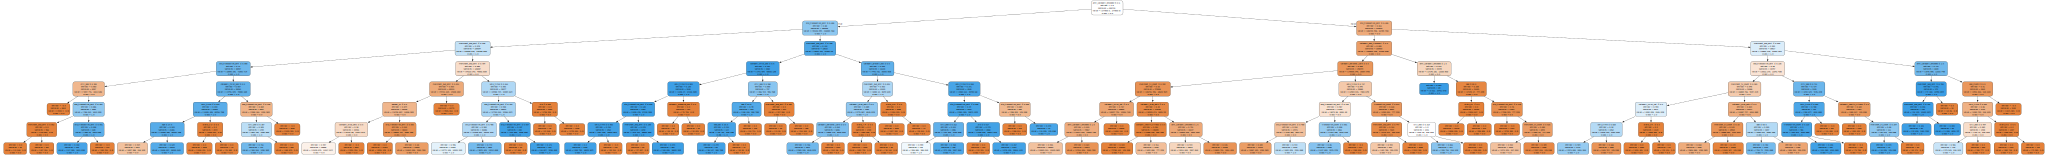

In [26]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier
import graphviz
from IPython.display import SVG, display

dot_data = export_graphviz(
    DecisionTree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=DecisionTree.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data, format="svg")


display(SVG(graph.pipe(format='svg')))


Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

    No Churn       1.00      0.86      0.92    553574
       Churn       0.02      0.86      0.04      2145

    accuracy                           0.86    555719
   macro avg       0.51      0.86      0.48    555719
weighted avg       1.00      0.86      0.92    555719

Training Accuracy: 0.8575
Test Accuracy: 0.8575
Overall Accuracy: 0.8575
G-Mean: 0.8609
Matthews Correlation Coefficient (MCC): 0.1270
Training Precision-Recall AUC: 0.2404
Test Precision-Recall AUC: 0.2404
Overall Precision-Recall AUC: 0.2404


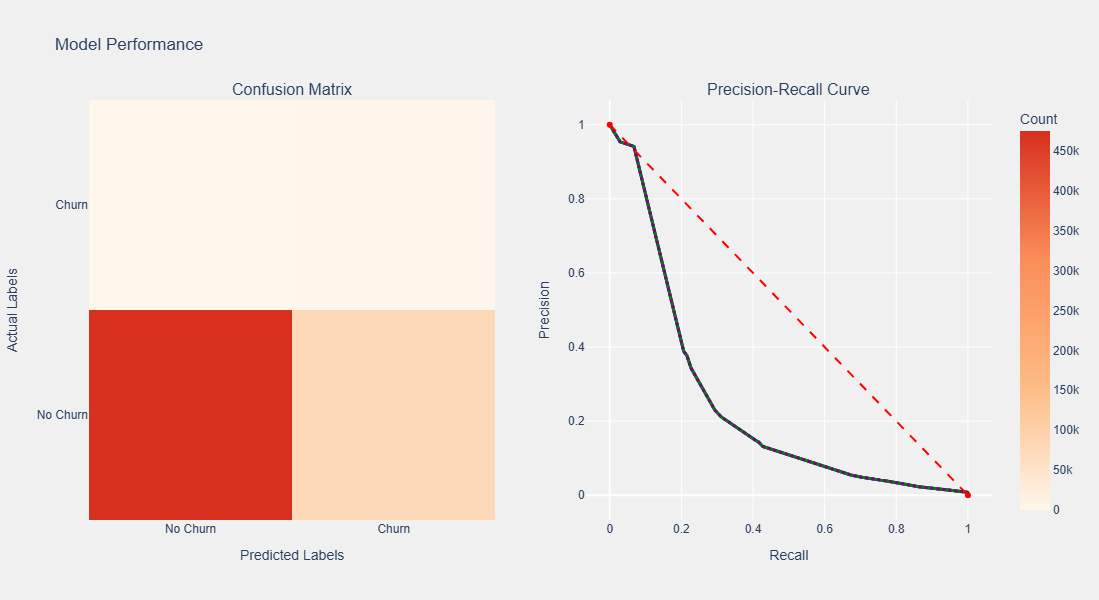

In [27]:
evaluate_model_interactive(
    DecisionTree, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    threshold_plot=False
)
